<a href="https://colab.research.google.com/github/LynnHiuko/Computational_Finance_Methods/blob/main/Miano_Lynn_200664_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIANO LYNN HIUKO  
200664  
MFI 8302  
COMPUTATIONAL METHODS IN FINANCE  
ASSIGNMENT 2  


Q1.  Consider the expression for the price of a European call option, namely
C(S, t) = e
−r(T −t) Eet

C(ST , T)

,
where Eet
is generated according to the process
dS = rS dt + σS dze(t).

(a) Approximate the expectation by simulating M paths for S

In [4]:
# Importing necesssary libraries
import numpy as np
from scipy.stats import norm
import time


In [5]:
# Writing the Black Scholes analytic price function
def bs_european_calls(S, K, r, sigma, tau):
  if tau <= 0:
    price = max(S - K, 0)
    return max(S - K, 0)
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

In [6]:
# Monte Carlo exact-sampling estimator
def mc_european_call_exact(S, K, r, sigma, t, T, M, seed=None):
  rng=np.random.default_rng(seed)
  tau = T - t
  if tau <= 0:
    price = max(S - K, 0.0)
    ci = (price, price)
    s = 0.0
    elapsed = 0.0
    return price, ci, s, elapsed

  start = time.time()
  Z = rng.standard_normal(M)
  S_T = S * np.exp((r - 0.5 * sigma ** 2) * tau + sigma * np.sqrt(tau) * Z)
  X = np.exp(-r * tau) * np.maximum(S_T - K, 0)
  price = np.mean(X)
  s = X.std(ddof = 1)
  se = s / np.sqrt(M)
  z95 = 1.96
  ci = (price - z95*se, price + z95*se)
  elapsed = time.time() - start
  return price, ci, s, elapsed

(b) Compare graphically the simulated values for various M with the true Black–Scholes
value

In [7]:
# Running with actual parameters
S = 100
K = 100
r = 0.05
sigma = 0.2
t = 0
T = 0.5
M_values = [500, 1000, 5000, 10000, 50000, 100000]
seed = 123

mc_estimates = []
ci_lowers = []
ci_uppers = []

for i, M in enumerate(M_values):
  price_mc, ci_mc, s_mc, elapsed = mc_european_call_exact(S, K, r, sigma, t, T, M, seed + i)
  price_bs = bs_european_calls(S, K, r, sigma, T - t)
  mc_estimates.append(price_mc)
  ci_lowers.append(ci_mc[0])
  ci_uppers.append(ci_mc[1])


print(f"Monte Carlo estimate (M={M}): {price_mc:.6f}")
print(f"95% CI: ({ci_mc[0]:.6f}, {ci_mc[1]:.6f})")
print(f"Sample std of discounted payoffs: {s_mc:.6f}")
print(f"Elapsed time: {elapsed:.3f} s")
print(f"Black-Scholes analytic price: {price_bs:.6f}")

Monte Carlo estimate (M=100000): 6.927695
95% CI: (6.866728, 6.988663)
Sample std of discounted payoffs: 9.836519
Elapsed time: 0.004 s
Black-Scholes analytic price: 6.888729


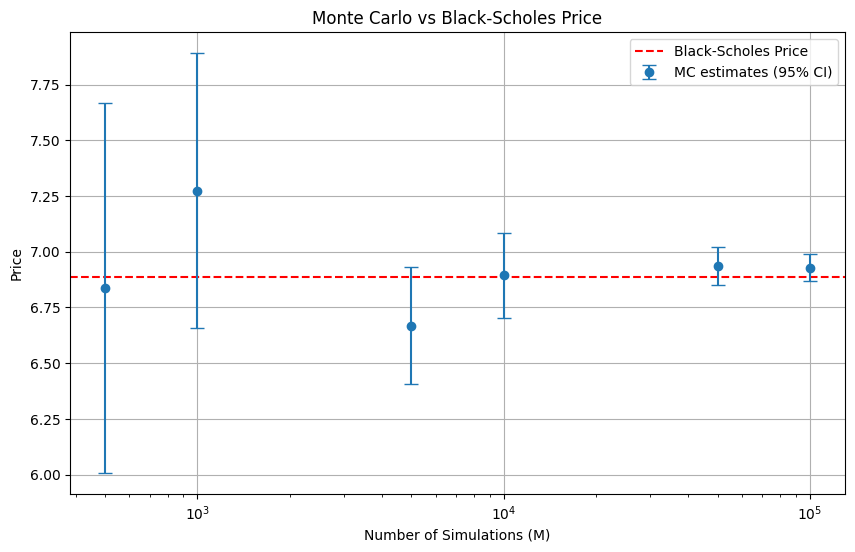

In [8]:
# Graphical presentation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.axhline(price_bs, color='r', linestyle='--', label='Black-Scholes Price')
plt.errorbar(M_values, mc_estimates,
             yerr=[np.array(mc_estimates)-np.array(ci_lowers), np.array(ci_uppers)-np.array(mc_estimates)],
             fmt='o', capsize=5, label="MC estimates (95% CI)")
plt.xscale('log')
plt.xlabel('Number of Simulations (M)')
plt.ylabel('Price')
plt.title('Monte Carlo vs Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.show()

(c)  Instead of using discretisation to simulate paths for S, use instead the explicit solution
for the GBM

In [39]:
def mc_european_call_explicit(S0, K, r, sigma, t, T, M, seed=None):
  rng = np.random.default_rng(seed)
  tau = T - t

  if tau <= 0:
    price = max(S0 - K, 0.0)
    ci = (price, price)
    s = 0.0
    elapsed = 0.0
    return price, ci, s, elapsed

    start = time.time()

    #Explicit solution for GBM
    Z = rng.standard_normal(M)
    S_T = S0 * np.exp((r - 0.5 * sigma ** 2) * tau + sigma * np.sqrt(tau) * Z)

    # Discounted payoff
    X= np.exp(-r * tau) * np.maximum(S_T - K, 0.0)

    # Monte Carlo estimate
    price = np.mean(X)
    s = X.std(ddof=1)
    se = s / np.sqrt(M)
    ci = (price - 1.96 * se, price + 1.96 * se)
    elapsed = time.time() - start

    return price, ci, s, elapsed


In [44]:
# Monte Carlo with explicit GBM
def mc_european_call_explicit(S0, K, r, sigma, t, T, M, seed=None):
    rng = np.random.default_rng(seed)
    tau = T - t

    if tau <= 0:
        price = max(S0 - K, 0.0)
        ci = (price, price)
        s = 0.0
        elapsed = 0.0
        return price, ci, s, elapsed

    start = time.time()
    # Explicit solution for GBM
    Z = rng.standard_normal(M)
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * tau + sigma * np.sqrt(tau) * Z)

    # Discounted payoff
    X = np.exp(-r * tau) * np.maximum(S_T - K, 0.0)

    # Monte Carlo estimate
    price = np.mean(X)
    s = X.std(ddof=1)
    se = s / np.sqrt(M)
    ci = (price - 1.96 * se, price + 1.96 * se)
    elapsed = time.time() - start

    return price, ci, s, elapsed

In [46]:
# Black–Scholes closed form
def bs_european_call(S, K, r, sigma, tau):
    if tau <= 0:
        return max(S - K, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
t = 0
T = 1
M = 100_000
seed = 123

# Run Monte Carlo
price_mc, ci_mc, s_mc, elapsed = mc_european_call_explicit(S0, K, r, sigma, t, T, M, seed)

# Compare with Black–Scholes
price_bs = bs_european_call(S0, K, r, sigma, T - t)

print(f"Monte Carlo (explicit GBM): {price_mc:.6f}, 95% CI=({ci_mc[0]:.6f}, {ci_mc[1]:.6f})")
print(f"Black–Scholes analytic:    {price_bs:.6f}")
print(f"Sample std of discounted payoffs: {s_mc:.6f}")
print(f"Elapsed time: {elapsed:.3f} s")

Monte Carlo (explicit GBM): 10.457350, 95% CI=(10.365945, 10.548755)
Black–Scholes analytic:    10.450584
Sample std of discounted payoffs: 14.747370
Elapsed time: 0.008 s
